# 第6章 k平均法：教師なし学習モデルの基礎

## 6.1 k平均法によるクラスタリングと応用例

**[06KM-01]**

必要なモジュールをインポートします。

特に、画像データを扱うためにPILモジュールを利用します。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.random import randint
from PIL import Image

**[06KM-02]**

画像ファイル「photo.jpg」をダウンロードします。

In [2]:
!curl -OL https://github.com/enakai00/colab_mlbook/raw/main/photo.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 47187  100 47187    0     0   133k      0 --:--:-- --:--:-- --:--:--  133k


**[06KM-03]**

画像ファイル「photo.jpg」を読み込んで表示します。

白、赤、緑の3色を中心に構成された画像です。

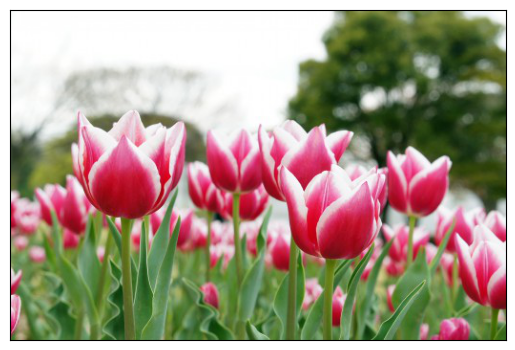

In [3]:
im = Image.open("photo.jpg")

fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
subplot.set_xticks([])
subplot.set_yticks([])
_ = subplot.imshow(im)

**[06KM-04]**

画像データを各ピクセルの (R,G,B) を並べたリストに変換して、確認のためにリストの先頭部分を表示します。

In [4]:
pixels = list(im.convert('RGB').getdata())
pixels[:10]

[(251, 253, 252),
 (250, 252, 251),
 (250, 252, 251),
 (250, 252, 251),
 (251, 253, 252),
 (252, 254, 253),
 (253, 255, 254),
 (255, 255, 255),
 (254, 254, 254),
 (254, 254, 254)]

**[06KM-05]**

k平均法で「代表色」を決定する関数を用意します。

$k$ 個の代表色を決定して、各ピクセルを代表色に置き換えたリストを返します。

In [5]:
def run_kmeans(pixels, k):
  print('Number of clusters: {}'.format(k))
  cls = [0] * len(pixels)

  # 代表色の初期値をランダムに設定
  centers = randint(256, size=(k, 3))
  print('Initial centers:')
  for c in centers:
    print('({:.2f}, {:.2f}, {:.2f})'.format(*c), end=' ')
  print('\n========================')
  distortion = float('inf')

  # 最大50回のIterationを実施
  for _ in range(50): 
    centers_new = np.zeros((k, 3))
    num_points = [0] * k
    distortion_new = 0.0

    # E Phase: 各データが属するグループ（代表色）を計算
    for pix, point in enumerate(pixels):
      point = np.array(point)
      dists = [np.dot(d, d) for d in centers - point]
      cls[pix] = np.argmin(dists)
      centers_new[cls[pix]] += point
      num_points[cls[pix]] += 1
      distortion_new += dists[cls[pix]]

    # M Phase: 新しい代表色を計算
    for i in range(k):
      if num_points[i] == 0:
        centers_new[i] = np.array([0, 0, 0])
      else:
        centers_new[i] = centers_new[i] / num_points[i]
    centers = centers_new
    for c in centers:
      print('({:.2f}, {:.2f}, {:.2f})'.format(*c), end=' ')
    print('\nDistortion: J={:.2f}'.format(distortion_new))

    # Distortion(J)の変化が0.1%未満になったら終了
    if distortion - distortion_new < distortion * 0.001:
        break
    distortion = distortion_new

  # 画像データの各ピクセルを代表色で置き換え
  new_pixels = []
  for pix in range(len(pixels)):
    new_pixels.append(tuple(centers[cls[pix]]))

  print("Done.")
  return list(map(lambda x: (int(x[0]), int(x[1]), int(x[2])), new_pixels))

**[06KM-06]**

例として、2つのクラスターに分類します。

In [6]:
result = run_kmeans(pixels, 2)

Number of clusters: 2
Initial centers:
(101.00, 153.00, 119.00) (58.00, 236.00, 145.00) 
(142.97, 124.14, 102.45) (252.20, 252.92, 252.67) 
Distortion: J=3891343865.00
(121.37, 101.52, 73.12) (239.94, 232.63, 235.01) 
Distortion: J=1261305248.45
(115.91, 98.03, 67.01) (236.44, 224.40, 227.93) 
Distortion: J=924540929.27
(114.16, 97.21, 65.27) (235.33, 221.59, 225.48) 
Distortion: J=901342834.45
(113.59, 96.98, 64.73) (234.98, 220.66, 224.68) 
Distortion: J=898979912.45
(113.39, 96.91, 64.56) (234.88, 220.35, 224.41) 
Distortion: J=898731803.41
Done.


**[06KM-07]**

結果を画像として表示します。

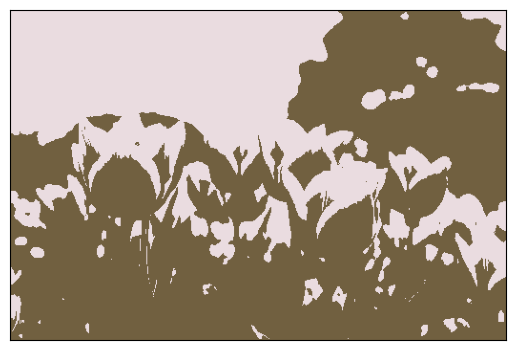

In [7]:
im.putdata(result)
fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
subplot.set_xticks([])
subplot.set_yticks([])
_ = subplot.imshow(im)

**[06KM-08]**

同様に、3つのクラスターに分類します。

In [8]:
result = run_kmeans(pixels, 3)

Number of clusters: 3
Initial centers:
(120.00, 116.00, 145.00) (233.00, 243.00, 172.00) (65.00, 115.00, 111.00) 
(175.35, 97.25, 100.21) (237.46, 227.32, 230.05) (78.88, 99.95, 47.92) 
Distortion: J=1379407534.00
(178.63, 95.52, 101.12) (237.68, 229.07, 231.54) (79.08, 101.94, 49.19) 
Distortion: J=583304340.71
(181.02, 93.61, 101.70) (237.75, 229.38, 231.77) (80.01, 103.18, 50.27) 
Distortion: J=581013624.08
(182.88, 91.71, 101.87) (237.71, 229.42, 231.77) (80.80, 104.13, 51.14) 
Distortion: J=579721599.15
(184.27, 89.91, 101.73) (237.64, 229.38, 231.69) (81.39, 104.93, 51.86) 
Distortion: J=578841240.62
(185.37, 88.15, 101.38) (237.54, 229.26, 231.56) (81.85, 105.62, 52.48) 
Distortion: J=578199060.56
(186.17, 86.51, 100.92) (237.43, 229.11, 231.40) (82.21, 106.22, 52.98) 
Distortion: J=577693723.27
Done.


**[06KM-09]**

結果を画像として表示します。

「白、赤、緑」が抽出されていることがわかります。

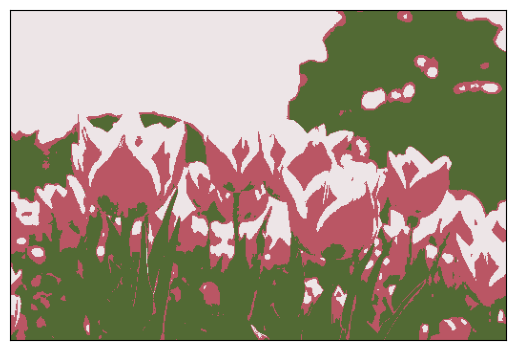

In [9]:
im.putdata(result)
fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
subplot.set_xticks([])
subplot.set_yticks([])
_ = subplot.imshow(im)

**[06KM-10]**

次は、8個のクラスターに分類して、結果を表示します。

Number of clusters: 8
Initial centers:
(53.00, 79.00, 126.00) (120.00, 232.00, 187.00) (1.00, 191.00, 149.00) (0.00, 97.00, 219.00) (150.00, 157.00, 160.00) (217.00, 138.00, 254.00) (131.00, 135.00, 131.00) (129.00, 86.00, 222.00) 
(67.57, 79.07, 35.94) (201.73, 215.82, 206.65) (0.00, 0.00, 0.00) (0.00, 0.00, 0.00) (196.09, 158.43, 160.91) (242.58, 231.42, 235.90) (141.08, 106.96, 79.73) (0.00, 0.00, 0.00) 
Distortion: J=1713054142.00
(67.87, 87.18, 37.25) (214.81, 202.47, 204.64) (19.32, 43.20, 12.84) (0.00, 0.00, 0.00) (202.70, 142.32, 154.52) (246.93, 244.73, 245.71) (141.41, 102.00, 77.72) (0.00, 0.00, 0.00) 
Distortion: J=466673673.92
(73.65, 98.21, 42.82) (218.38, 200.33, 205.16) (30.37, 56.17, 18.39) (10.00, 19.88, 6.38) (201.79, 132.03, 146.68) (248.14, 247.53, 247.82) (141.87, 99.00, 75.95) (0.00, 0.00, 0.00) 
Distortion: J=407428228.91
(80.15, 109.27, 49.88) (218.41, 198.86, 204.09) (38.71, 62.50, 21.79) (13.53, 35.24, 10.24) (200.14, 126.30, 141.44) (248.37, 247.94, 248.15) 

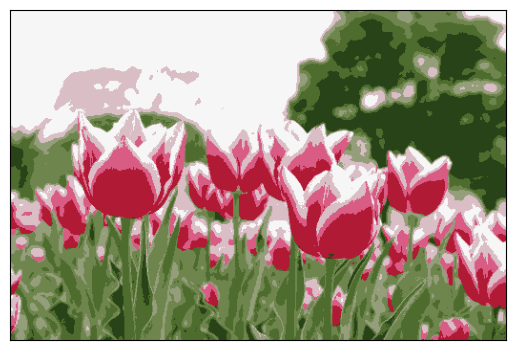

In [10]:
result = run_kmeans(pixels, 8)

im.putdata(result)
fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
subplot.set_xticks([])
subplot.set_yticks([])
_ = subplot.imshow(im)

**[06KM-11]**

最後に16個のクラスターに分類して、結果を表示します。

Number of clusters: 16
Initial centers:
(49.00, 118.00, 35.00) (93.00, 139.00, 109.00) (39.00, 161.00, 61.00) (108.00, 164.00, 229.00) (99.00, 207.00, 174.00) (230.00, 162.00, 17.00) (156.00, 89.00, 237.00) (158.00, 7.00, 182.00) (184.00, 45.00, 221.00) (61.00, 161.00, 212.00) (31.00, 70.00, 92.00) (93.00, 42.00, 18.00) (188.00, 131.00, 77.00) (152.00, 62.00, 16.00) (84.00, 238.00, 31.00) (195.00, 85.00, 1.00) 
(68.81, 99.03, 39.85) (111.67, 138.58, 86.78) (73.21, 140.47, 64.63) (242.77, 239.65, 240.72) (183.32, 190.62, 177.30) (0.00, 0.00, 0.00) (234.51, 165.19, 195.23) (215.09, 41.07, 112.76) (235.41, 107.25, 165.84) (0.00, 0.00, 0.00) (52.63, 70.32, 52.61) (48.24, 50.41, 20.31) (198.60, 110.58, 121.92) (176.53, 26.42, 51.10) (0.00, 0.00, 0.00) (227.18, 21.80, 62.48) 
Distortion: J=1780192109.00
(75.54, 102.69, 41.55) (118.24, 139.83, 87.15) (87.11, 127.63, 59.85) (245.06, 243.61, 244.13) (184.59, 187.95, 173.67) (10.64, 31.77, 8.62) (230.59, 174.93, 195.65) (214.43, 54.72, 104.70) (

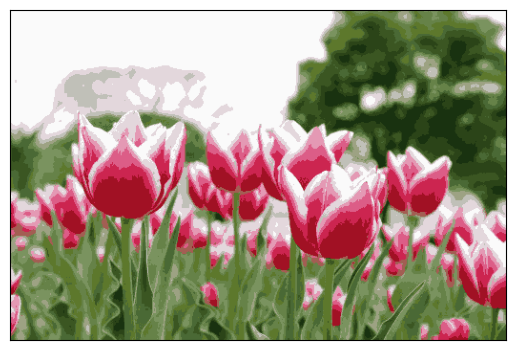

In [11]:
result = run_kmeans(pixels, 16)

im.putdata(result)
fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
subplot.set_xticks([])
subplot.set_yticks([])
_ = subplot.imshow(im)